In [1]:
import glob, json
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from lib import *

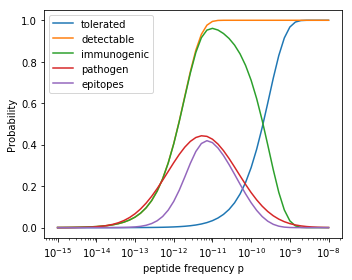

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))
p = np.logspace(-15, -8)
N = 2e7
NT = 9*19
ax.plot(p, 1-np.exp(- p * NT * N), label='tolerated')
ND = 9*8*19**2
ax.plot(p, 1-np.exp(- p * ND * N), label='detectable')
ax.plot(p, (1-np.exp(- p * ND * N))*np.exp(- p * NT * N), label='immunogenic')
k = 9
mu = -1.25
sigma = 0.3
ax.plot(p, scipy.stats.norm.pdf(np.log10(p), k*mu, k**.5*sigma), label='pathogen')
ax.plot(p, (1-np.exp(- p * ND*N))*np.exp(- p * NT*N)*scipy.stats.norm.pdf(np.log10(p), k*mu, k**.5*sigma), label='epitopes')
ax.legend(loc='upper left')
ax.set_xscale('log')
ax.set_xlabel('peptide frequency p')
ax.set_ylabel('Probability')
fig.tight_layout()
fig.savefig('plots/frequencywindow.png', dpi=300)
fig.savefig('../paper/shelltheory.pdf')